## Spectral analysis of Audio signals in Python

Necessary imports

In [32]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import IPython
import sounddevice as sd

Creating a sample sinusoid

In [33]:
t = np.linspace(0,1,1000)
x = np.sin(2*np.pi*230*t) #since we are using natural frequency (in Hz) we define t in sec
# if we use a [0,2pi]-bounded frequency, n should take integer values.

In [34]:
#sd.play(x,1000)
#sd.play(x,3000) #increasing the sampling rate -> higher frequency

In [35]:
IPython.display.Audio(x,rate=1000)

Computing+plotting its DFT (in either linear or logarithmic scale)

Text(0.5, 1.0, 'DFT of sinusoid')

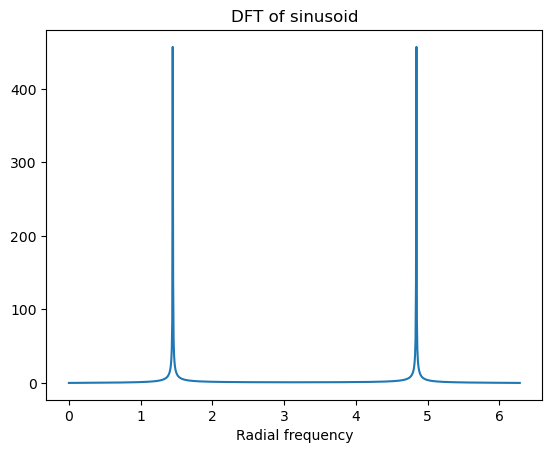

In [36]:
%matplotlib inline
y = np.fft.fft(x) #num of fft points = num of signal length if not explicitly defined
f = np.linspace(0,2*np.pi,1000) #to define a [0,2π] frequency axis
plt.plot(f,np.abs(y))
plt.xlabel('Radial frequency')
plt.title('DFT of sinusoid')

Text(0.5, 1.0, 'DFT of sinusoid')

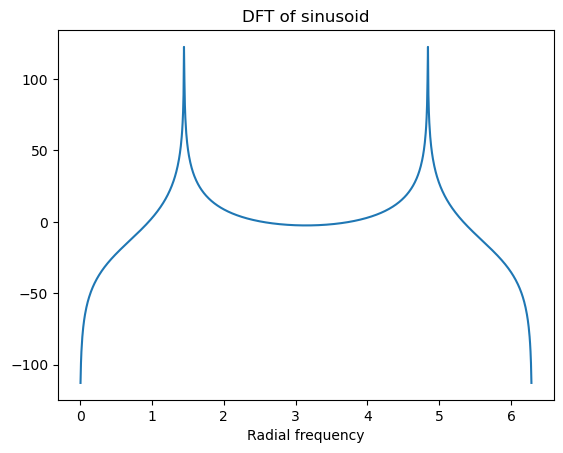

In [37]:
%matplotlib inline
y = np.fft.fft(x)
f = np.linspace(0,2*np.pi,1000)
plt.plot(f[1:],20*np.log(np.abs(y[1:])))
plt.xlabel('Radial frequency')
plt.title('DFT of sinusoid')

Text(0.5, 1.0, 'DFT of sinusoid')

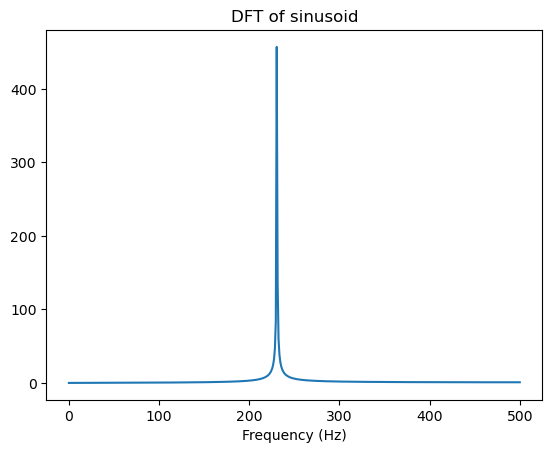

In [38]:
%matplotlib inline
y_cut = y[:500]
f = np.linspace(0,500,500) #(0,fs/2,len(DFT_onesided))
plt.plot(f,np.abs(y_cut))
plt.xlabel('Frequency (Hz)')
plt.title('DFT of sinusoid')

In [39]:
print(np.argmax(np.abs(y_cut))) #index that corresponds to the peak of the DFT of the sinusoid

230


Repeating the above process for a noisy sinusoid

In [40]:
t = np.linspace(0,1,1000)
x = np.sin(2*np.pi*230*t) + 0.15*np.random.normal(size=(1000,))

In [41]:
#sd.play(x,1000)

In [42]:
IPython.display.Audio(x,rate=1000)

Text(0.5, 1.0, 'DFT of noisy sinusoid')

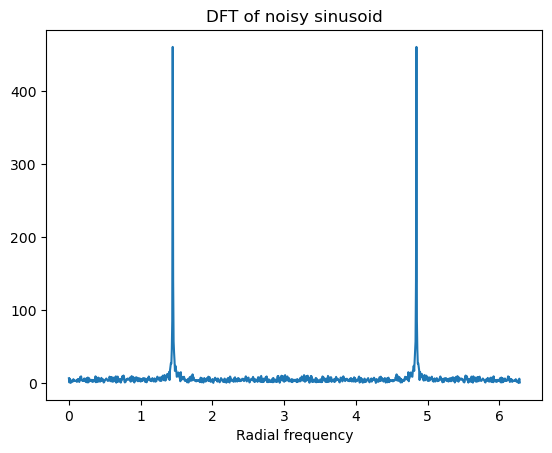

In [43]:
%matplotlib inline
y = np.fft.fft(x)
f = np.linspace(0,2*np.pi,1000)
plt.plot(f,np.abs(y))
plt.xlabel('Radial frequency')
plt.title('DFT of noisy sinusoid')

In [44]:
print(np.argmax(np.abs(y[:500])))

230


Scipy: Loading a file + displaying its spectrogram

In [45]:
#sr = 22050
fs,y = sp.io.wavfile.read('song_excerpt_1.wav',48000) #fs: sampling freq, y: the audio array

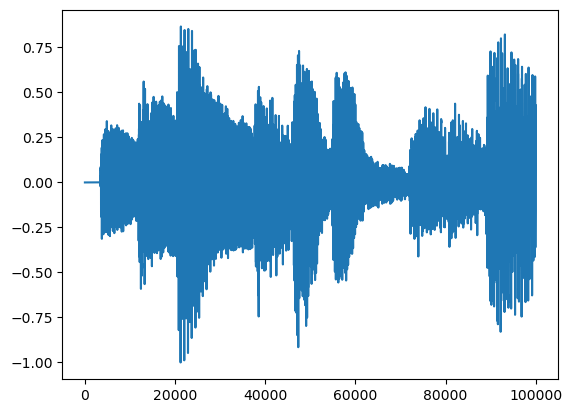

In [46]:
segment = y[:100000]
segment = segment/(np.max(np.abs(segment))) #normalization of segment in an [-1,1] range
%matplotlib inline
plt.plot(segment)

In [47]:
#STFT spectrogram computation
#args: audio input, fs, window size, overlap (n_fft = window size if not explicitly defined)
#output: frequency and time axes, and spectrogram
f,t,S = sp.signal.stft(segment,fs=48000,nperseg=1024,noverlap=512) 
print(t.shape,f.shape,S.shape)

(197,) (513,) (513, 197)


In [48]:
f2,t2,S2 = sp.signal.stft(segment,fs=48000,nperseg=512,noverlap=256) #number of horizontal/vertical bins is determined by nperseg/noverlap.
print(S2.shape)

(257, 392)


Text(0.5, 1.0, 'STFT of the signal segment')

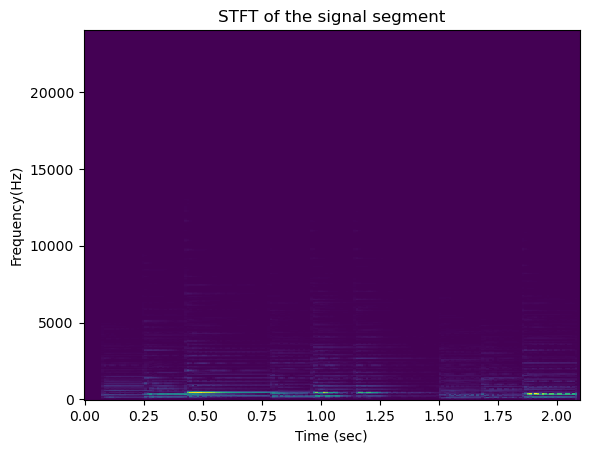

In [49]:
%matplotlib inline
plt.pcolormesh(t,f,np.abs(S))
plt.xlabel('Time (sec)')
plt.ylabel('Frequency(Hz)')
plt.title('STFT of the signal segment')

Text(0.5, 1.0, 'Log-STFT of the signal segment')

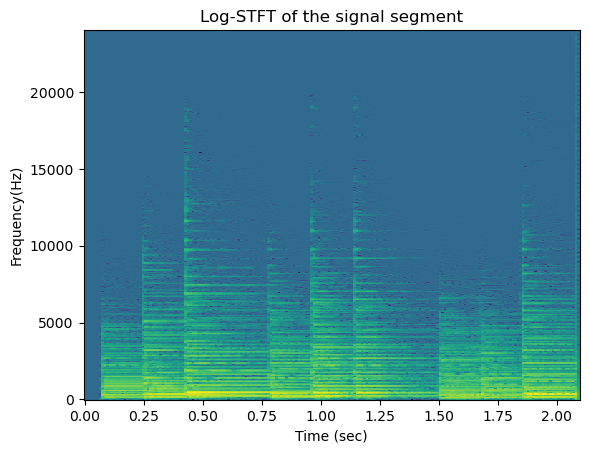

In [50]:
%matplotlib inline
plt.pcolormesh(t,f,np.log10(np.abs(S+0.0001))) #small constant is added for numerical stability
plt.xlabel('Time (sec)')
plt.ylabel('Frequency(Hz)')
plt.title('Log-STFT of the signal segment')